# Multiclass Text Tagging with Doc2Vec
<span style="color:red">Disclaimer: This notebook has been run on Google Colab!</span>

In [0]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data_path = "/content/drive/My Drive/Cognitive Services/data/{}.npy"

In [0]:
Xtr = np.load(data_path.format("Xtr"), allow_pickle=True)
Xte = np.load(data_path.format("Xte"), allow_pickle=True)
Ytr = np.load(data_path.format("Ytr"), allow_pickle=True)
Yte = np.load(data_path.format("Yte"), allow_pickle=True)

## MLP classifier

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

In [0]:
model = Sequential()
model.add(Dense(5000, activation='relu', input_dim=Xtr.shape[1]))
model.add(Dropout(0.1))
model.add(Dense(600, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(Ytr.shape[1], activation='softmax'))

W0622 18:28:17.910907 140035209521024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0622 18:28:17.925148 140035209521024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0622 18:28:17.944828 140035209521024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0622 18:28:17.955224 140035209521024 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Ins

In [0]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

W0622 18:28:22.972890 140035209521024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0622 18:28:22.979574 140035209521024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0622 18:28:22.985071 140035209521024 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
model.fit(Xtr, Ytr, epochs=500, batch_size=2000)

Epoch 1/500
108160/108160 [==============================] - 1s 10us/step - loss: 0.0557
Epoch 2/500
108160/108160 [==============================] - 1s 9us/step - loss: 0.0556
Epoch 3/500
108160/108160 [==============================] - 1s 9us/step - loss: 0.0556
Epoch 4/500
108160/108160 [==============================] - 1s 9us/step - loss: 0.0555
Epoch 5/500
108160/108160 [==============================] - 1s 9us/step - loss: 0.0554
Epoch 6/500
108160/108160 [==============================] - 1s 9us/step - loss: 0.0553
Epoch 7/500
108160/108160 [==============================] - 1s 10us/step - loss: 0.0553
Epoch 8/500
108160/108160 [==============================] - 1s 9us/step - loss: 0.0552
Epoch 9/500
108160/108160 [==============================] - 1s 9us/step - loss: 0.0551
Epoch 10/500
108160/108160 [==============================] - 1s 9us/step - loss: 0.0551
Epoch 11/500
108160/108160 [==============================] - 1s 10us/step - loss: 0.0550
Epoch 12/500
108160/108160 

KeyboardInterrupt: ignored

In [0]:
model.predict_classes(Xte)

array([31, 58, 39, ...,  1, 48,  9])

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, f1_score

In [0]:
cm = confusion_matrix(np.argmax(Yte, axis=1), model.predict_classes(Xte))

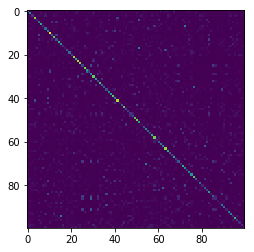

In [0]:
plt.imshow(cm)

In [0]:
accuracy_score(np.argmax(Yte, axis=1), model.predict_classes(Xte))

0.3269230769230769

In [0]:
balanced_accuracy_score(np.argmax(Yte, axis=1), model.predict_classes(Xte))

0.32736501008419105

In [0]:
f1_score(np.argmax(Yte, axis=1), model.predict_classes(Xte), average="weighted")

0.30561229972648607